# Pseudo Labeling

## fusion model

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm
import shutil
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

PATH = Path.cwd().parents[1]

import sys
sys.path.append(str(PATH))

from backend.utils.models.fusion_data import grouping_data, predict_by_model_fusion
from backend.utils.comparing import plot_confusion_matrix
MODEL_PATH = os.path.join(PATH, 'backend/models')
DATA_PATH = os.path.join(PATH, 'data')
LABELED_PATH = os.path.join(DATA_PATH, 'labeled')
UNLABELED_PATH = os.path.join(DATA_PATH, 'unlabeled')
round_num = 2

## Test With Groundtruth

In [56]:
feature, ground_df, label_cols = grouping_data(LABELED_PATH, MODEL_PATH, 'groundtruth.csv')

invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH30
invalid instruction: PUSH20
invalid instruction: PUSH18
invalid instruction: PUSH28
invalid instruction: PUSH32
invalid instruction: PUSH31
invalid instruction: PUSH30
invalid instruction: PUSH27
invalid instruction: PUSH27
invalid instruction: PUSH27
invalid instruction: PUSH31
invalid instruction: PUSH25
invalid instruction: PUSH14
invalid instruction: PUSH32
invalid instruction: PUSH30
invalid instruction: PUSH25
invalid instruction: PUSH30
invalid instruction: PUSH15
invalid instruction: PUSH22
invalid instruction: PUSH20
invalid instruction: PUSH24
invalid instruction: PUSH30
invalid instruction: PUSH26
invalid instruction: PUSH16
invalid instruction: PUSH23
invalid instruction: PUSH8
invalid instruction: PUSH17
invalid instruction: PUSH14
invalid instruction: PUSH15
invalid instruction: PUSH5
invalid instruction: PUSH7
invalid instruction: PUSH10
invalid instruction: PUSH27
invalid instruction: PU

Skipping 0x6ce8b8eed077f9b49c1fa684008ebb7562bb41ad: invalid literal for int() with base 10: ''


Extracting timeline features:  15%|█▍        | 36/246 [00:00<00:01, 110.82it/s]

Skipping 0x740e6b6f0a0165e8bb3d1cdf94862bdffbded22e: invalid literal for int() with base 10: ''


Extracting timeline features:  23%|██▎       | 57/246 [00:00<00:03, 53.68it/s] 

Skipping 0x36b14bae0989f65f80892b99a55378d3e1a80c81: invalid literal for int() with base 10: ''
Skipping 0x7fc408011165760ee31be2bf20daf450356692af: invalid literal for int() with base 10: ''
Skipping 0xdd007278b667f6bef52fd0a4c23604aa1f96039a: invalid literal for int() with base 10: ''


Extracting timeline features:  41%|████▏     | 102/246 [00:01<00:02, 64.07it/s]

Skipping 0x4e7a34c6c29a4741858a7ec5622cd8be21b0351b: invalid literal for int() with base 10: ''


Extracting timeline features:  52%|█████▏    | 127/246 [00:02<00:01, 80.77it/s]

Skipping 0xc310755f88145cabcaa06c714cd668b5465dceaa: invalid literal for int() with base 10: ''


Extracting timeline features:  67%|██████▋   | 166/246 [00:02<00:01, 70.48it/s]

Skipping 0xff1560afef58be59b11c72734ad1d89db63e4e71: invalid literal for int() with base 10: ''


Extracting timeline features:  76%|███████▌  | 186/246 [00:02<00:00, 96.13it/s]

Skipping 0xf1afddbed214dba82cb98d46ad0a96e643f7f6f6: invalid literal for int() with base 10: ''


Extracting timeline features:  88%|████████▊ | 217/246 [00:03<00:00, 74.47it/s]

Skipping 0xb9aac097f4dadcd6f06761eb470346415ef28d5a: invalid literal for int() with base 10: ''
Skipping 0x56ba2ee7890461f463f7be02aac3099f6d5811a8: invalid literal for int() with base 10: ''
Skipping 0x2f22c502a8029d5e64aeafb6e0a214c0323f43c7: invalid literal for int() with base 10: ''
Skipping 0x76bc9e61a1904b82cbf70d1fd9c0f8a120483bbb: invalid literal for int() with base 10: ''


Extracting timeline features:  98%|█████████▊| 242/246 [00:03<00:00, 65.92it/s]

Skipping 0x514bc174df04a4b04ae2be81ee8c788c3796b06b: invalid literal for int() with base 10: ''


Extracting timeline features: 100%|██████████| 246/246 [00:03<00:00, 63.39it/s]


In [57]:
list(feature.items())[0]

('0x93023f1d3525e273f291b6f76d2f5027a39bf302',
 {'byte': opcode_entropy                    0.0
  byte_entropy                      0.0
  byte_0x                           1.0
  byte_60                           0.0
  byte_80                           0.0
                                   ... 
  returndatasize push1 return       0.0
  iszero eq push2                   0.0
  returndatacopy dup1               0.0
  dup1 returndatacopy dup1          0.0
  return jumpdest returndatasize    0.0
  Name: 0x93023f1d3525e273f291b6f76d2f5027a39bf302, Length: 9548, dtype: float64,
  'txn': txn_nums              0.0
  event_nums            0.0
  creation_block        0.0
  creation_timestamp    0.0
  start_block           0.0
                       ... 
  slashstake_num        0.0
  banauditor_num        0.0
  owner_num             0.0
  setdth_num            0.0
  init_num              0.0
  Name: 0x93023f1d3525e273f291b6f76d2f5027a39bf302, Length: 370, dtype: float64,
  'code': solidity    0.0
 

              precision    recall  f1-score   support

        Mint       0.98      1.00      0.99        47
        Leak       1.00      0.99      0.99        83
       Limit       1.00      1.00      1.00        55

   micro avg       0.99      0.99      0.99       185
   macro avg       0.99      1.00      0.99       185
weighted avg       0.99      0.99      0.99       185
 samples avg       0.75      0.75      0.75       185



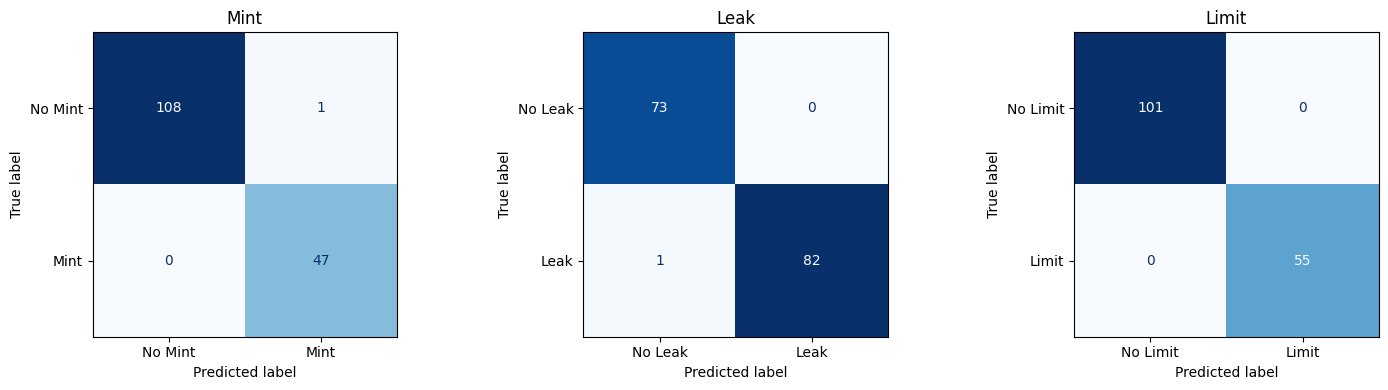

In [58]:
preds_df = predict_by_model_fusion(MODEL_PATH, feature, label_cols)
preds_df = preds_df.rename(columns={col: f'pred_{col}' for col in label_cols})
merged_df = pd.merge(preds_df.reset_index(), ground_df.reset_index(), on='Address', how='inner')
plot_confusion_matrix(merged_df[label_cols], merged_df[[f'pred_{col}' for col in label_cols]], label_cols)

============== Threshold: 0.5 ==============
              precision    recall  f1-score   support

        Mint       0.95      1.00      0.98        20
        Leak       0.82      1.00      0.90         9
       Limit       1.00      1.00      1.00        30

   micro avg       0.95      1.00      0.98        59
   macro avg       0.92      1.00      0.96        59
weighted avg       0.96      1.00      0.98        59
 samples avg       0.59      0.61      0.60        59



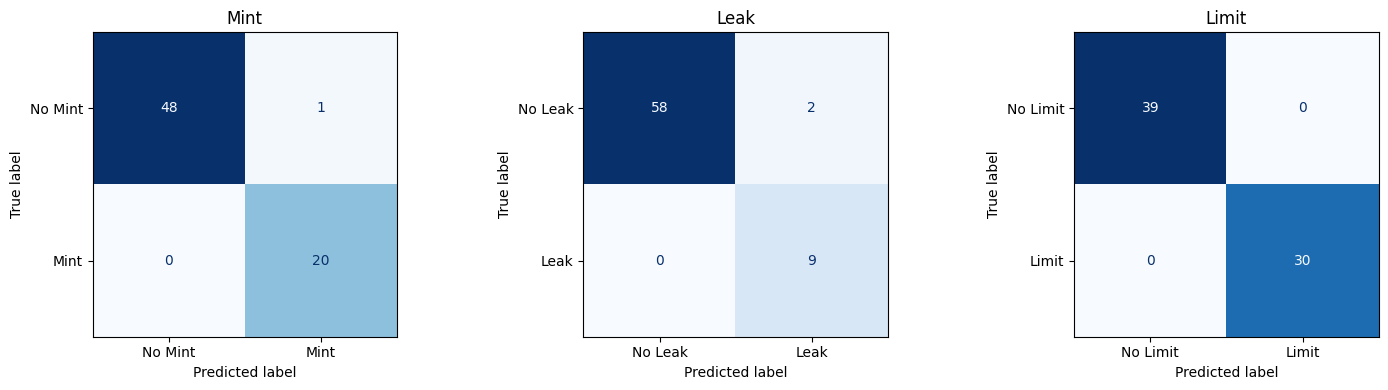

============== Threshold: 0.6 ==============
              precision    recall  f1-score   support

        Mint       0.95      1.00      0.98        20
        Leak       1.00      1.00      1.00         9
       Limit       1.00      1.00      1.00        30

   micro avg       0.98      1.00      0.99        59
   macro avg       0.98      1.00      0.99        59
weighted avg       0.98      1.00      0.99        59
 samples avg       0.60      0.61      0.60        59



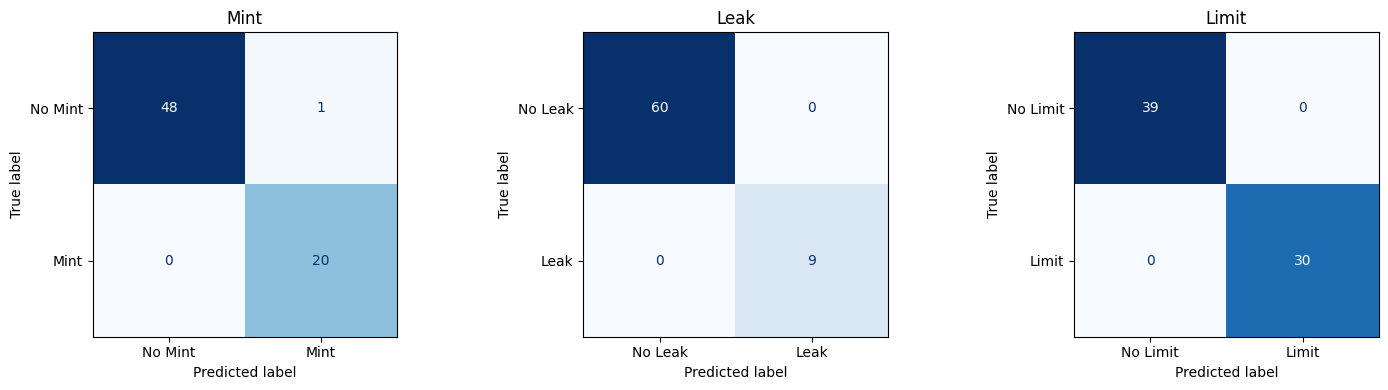

============== Threshold: 0.7 ==============
              precision    recall  f1-score   support

        Mint       0.95      0.95      0.95        20
        Leak       1.00      1.00      1.00         9
       Limit       1.00      1.00      1.00        30

   micro avg       0.98      0.98      0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59
 samples avg       0.59      0.59      0.59        59



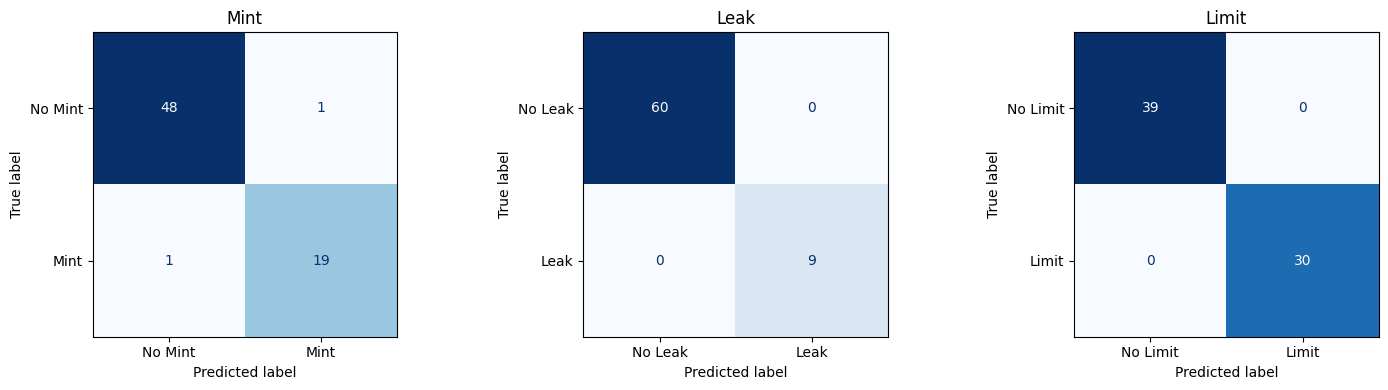

============== Threshold: 0.7999999999999999 ==============
              precision    recall  f1-score   support

        Mint       1.00      0.90      0.95        20
        Leak       1.00      1.00      1.00         9
       Limit       1.00      0.93      0.97        30

   micro avg       1.00      0.93      0.96        59
   macro avg       1.00      0.94      0.97        59
weighted avg       1.00      0.93      0.96        59
 samples avg       0.58      0.57      0.57        59



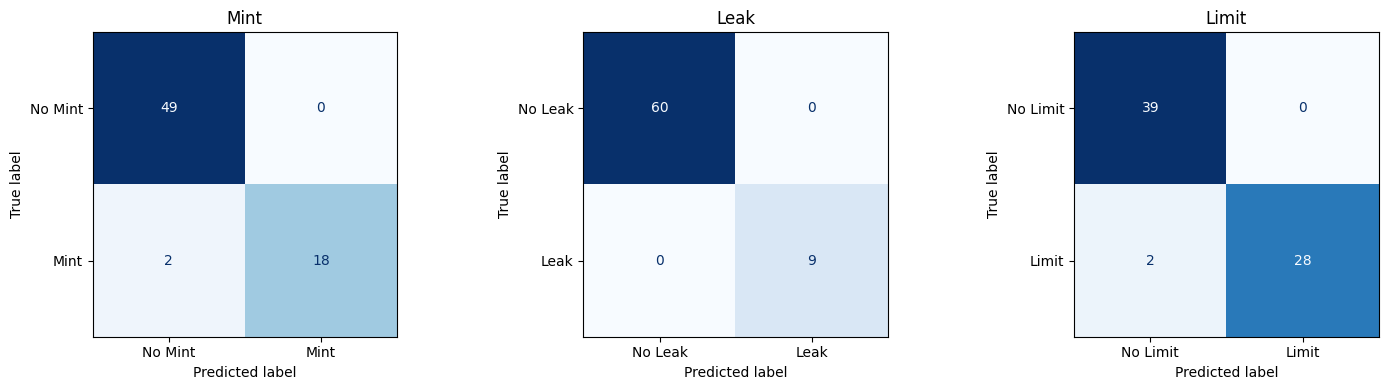

============== Threshold: 0.8999999999999999 ==============
              precision    recall  f1-score   support

        Mint       1.00      0.30      0.46        20
        Leak       1.00      0.78      0.88         9
       Limit       1.00      0.30      0.46        30

   micro avg       1.00      0.37      0.54        59
   macro avg       1.00      0.46      0.60        59
weighted avg       1.00      0.37      0.52        59
 samples avg       0.25      0.21      0.22        59



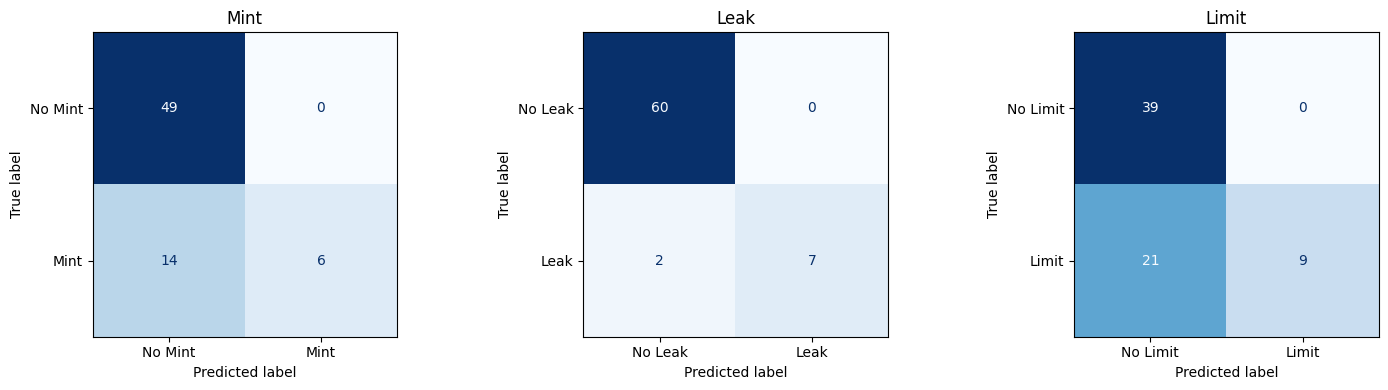

In [6]:
for threshold in np.arange(0.5, 1, 0.1):
    print(f"============== Threshold: {threshold} ==============")
    preds_df = predict_by_model_fusion(MODEL_PATH, feature, label_cols, threshold)
    preds_df = preds_df.rename(columns={col: f'pred_{col}' for col in label_cols})
    merged_df = pd.merge(preds_df.reset_index(), ground_df.reset_index(), on='Address', how='inner')
    plot_confusion_matrix(merged_df[label_cols], merged_df[[f'pred_{col}' for col in label_cols]], label_cols)


## Test With Unlabelled

In [74]:
feature, ground_df, label_cols = grouping_data(UNLABELED_PATH, MODEL_PATH, 'groundtruth.csv')

invalid instruction: PUSH18
invalid instruction: PUSH32
invalid instruction: PUSH31
invalid instruction: PUSH27
invalid instruction: PUSH27
invalid instruction: PUSH27
invalid instruction: PUSH25
invalid instruction: PUSH32
invalid instruction: PUSH15
invalid instruction: PUSH22
invalid instruction: PUSH7
invalid instruction: PUSH27
invalid instruction: PUSH17
invalid instruction: PUSH28
invalid instruction: PUSH18
invalid instruction: PUSH19
invalid instruction: PUSH24
invalid instruction: PUSH23
invalid instruction: PUSH25
invalid instruction: PUSH27
invalid instruction: PUSH28
invalid instruction: PUSH19
invalid instruction: PUSH29
invalid instruction: PUSH22
invalid instruction: PUSH23
invalid instruction: PUSH29
invalid instruction: PUSH26
invalid instruction: PUSH26
invalid instruction: PUSH29
invalid instruction: PUSH25
invalid instruction: PUSH20
invalid instruction: PUSH26
invalid instruction: PUSH26
invalid instruction: PUSH26
invalid instruction: PUSH23
invalid instruction: 

Skipping 0x740e6b6f0a0165e8bb3d1cdf94862bdffbded22e: invalid literal for int() with base 10: ''
Skipping 0x7fc408011165760ee31be2bf20daf450356692af: invalid literal for int() with base 10: ''


Extracting timeline features:  89%|████████▉ | 82/92 [00:00<00:00, 96.34it/s] 

Skipping 0x56ba2ee7890461f463f7be02aac3099f6d5811a8: invalid literal for int() with base 10: ''
Skipping 0x2f22c502a8029d5e64aeafb6e0a214c0323f43c7: invalid literal for int() with base 10: ''
Skipping 0x514bc174df04a4b04ae2be81ee8c788c3796b06b: invalid literal for int() with base 10: ''


Extracting timeline features: 100%|██████████| 92/92 [00:00<00:00, 97.65it/s]


In [75]:
for threshold in np.arange(0.0, 1, 0.1):
    print(f"============== Threshold: {threshold} ==============")
    preds_df = predict_by_model_fusion(MODEL_PATH, feature, label_cols, threshold)
    preds_df = preds_df.rename(columns={col: f'pred_{col}' for col in label_cols})
    merged_df = pd.merge(preds_df.reset_index(), ground_df.reset_index(), on='Address', how='inner')
    target = 'Mint'
    y_true, y_pred = merged_df[target], merged_df[f'pred_{target}']
    print(classification_report(y_true, y_pred))

============== Threshold: 0.0 ==============
              precision    recall  f1-score   support

           0       0.50      0.07      0.12        14
           1       0.86      0.99      0.92        78

    accuracy                           0.85        92
   macro avg       0.68      0.53      0.52        92
weighted avg       0.80      0.85      0.80        92

============== Threshold: 0.1 ==============
              precision    recall  f1-score   support

           0       0.33      0.14      0.20        14
           1       0.86      0.95      0.90        78

    accuracy                           0.83        92
   macro avg       0.60      0.55      0.55        92
weighted avg       0.78      0.83      0.80        92

============== Threshold: 0.2 ==============
              precision    recall  f1-score   support

           0       0.15      0.64      0.25        14
           1       0.85      0.36      0.50        78

    accuracy                           0.40    

In [76]:
preds_df = predict_by_model_fusion(MODEL_PATH, feature, label_cols, [0, 0.2, 0.2])
preds_df = preds_df.rename(columns={col: f'pred_{col}' for col in label_cols})
merged_df = pd.merge(preds_df.reset_index(), ground_df.reset_index(), on='Address', how='inner')
merged_df['Mint'].value_counts(), merged_df['pred_Leak'].value_counts(), merged_df['pred_Limit'].value_counts()

(Mint
 1    78
 0    14
 Name: count, dtype: int64,
 pred_Leak
 1    52
 0    40
 Name: count, dtype: int64,
 pred_Limit
 0    69
 1    23
 Name: count, dtype: int64)

In [77]:
merged_df = merged_df[['Address', 'Mint', 'pred_Leak', 'pred_Limit']].rename(columns={'pred_Leak': 'Leak', 'pred_Limit': 'Limit'}).set_index('Address')
merged_df.value_counts()

Mint  Leak  Limit
1     0     0        32
      1     0        26
            1        19
0     0     0         6
      1     0         5
            1         2
      0     1         1
1     0     1         1
Name: count, dtype: int64

In [78]:
ground_df = pd.read_csv(os.path.join(LABELED_PATH, 'groundtruth.csv'), index_col=0)

In [79]:
new_ground_df = pd.concat([ground_df, merged_df]).reset_index()
new_ground_df

,Address,Mint,Leak,Limit
0,0x93023f1d3525e273f291b6f76d2f5027a39bf302,1,0,1
1,0x2753dce37a7edb052a77832039bcc9aa49ad8b25,0,0,1
2,0x94b7d24552933f50a5a5705c446528806dcea381,0,0,0
3,0xe0b9d4146aad6936cbfcbe4dae47e34aab96b093,0,0,0
4,0x10f6f2b97f3ab29583d9d38babf2994df7220c21,1,0,1
...,...,...,...,...
243,0x54ee540b38fc6e0548172fe651927d85366c6bf7,1,0,0
244,0x8d46facfb889740a345755e624942257dc87b5ac,1,1,0
245,0x7a1c0aa1e5bd4cc05af8c0283fd4aebedd7cadcf,1,1,0
246,0xb6d699699ccc50548c1916b02afff6e5a7bc4117,1,0,0


In [80]:
ground_df.to_csv(os.path.join(DATA_PATH, f'logs/groundtruth-{round_num-1}.csv'))

In [81]:
new_ground_df.to_csv(os.path.join(LABELED_PATH, 'groundtruth.csv'), index=False)

In [82]:
HEX_PATH = os.path.join(UNLABELED_PATH, 'hex')
SOL_PATH = os.path.join(UNLABELED_PATH, 'sol')
TXN_PATH = os.path.join(UNLABELED_PATH, 'txn')

for src_file in tqdm(list(Path(HEX_PATH).glob('*.hex'))):
    address = src_file.stem.lower()
    shutil.move(src_file, os.path.join(LABELED_PATH, f'hex/{address}.hex'))

for src_file in tqdm(list(Path(SOL_PATH).glob('*.sol'))):
    address = src_file.stem.lower()
    shutil.move(src_file, os.path.join(LABELED_PATH, f'sol/{address}.sol'))

for src_file in tqdm(list(Path(TXN_PATH).glob('*.json'))):
    address = src_file.stem.lower()
    shutil.move(src_file, os.path.join(LABELED_PATH, f'txn/{address}.json'))

100%|██████████| 92/92 [00:00<00:00, 387.43it/s]
